   ID  Video Duration   Video Publish Time  Days Since Publish  Day  Month  \
0   0           201.0  2016-06-02 00:00:00                   0    2      6   
1   1           391.0  2016-06-10 00:00:00                   8   10      6   
2   2           133.0  2016-06-14 00:00:00                   4   14      6   
3   3            14.0  2016-06-29 00:00:00                  15   29      6   
4   4            45.0  2016-07-01 00:00:00                   2    1      7   

   Year Day of Week  Revenue per 1000 Views (USD)  \
0  2016    Thursday                         0.024   
1  2016      Friday                         0.056   
2  2016     Tuesday                         0.014   
3  2016   Wednesday                         0.004   
4  2016      Friday                         0.000   

   Monetized Playbacks (Estimate)  ...  Watched (Not Skipped) (%)  \
0                           723.0  ...                        0.0   
1                           727.0  ...                        0.0   
2    

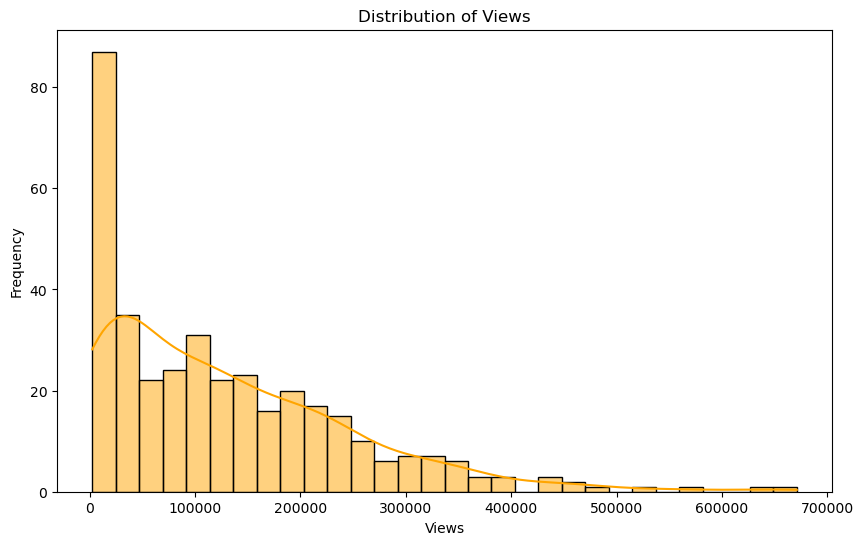

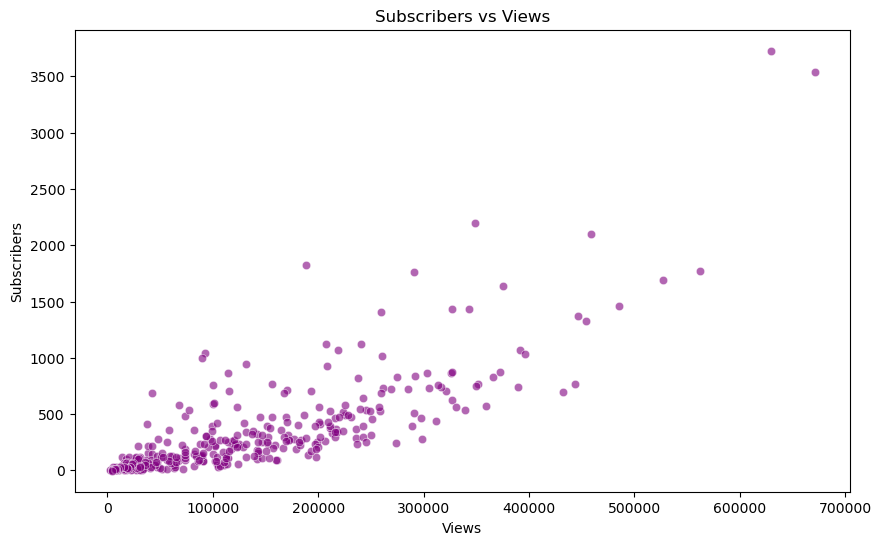

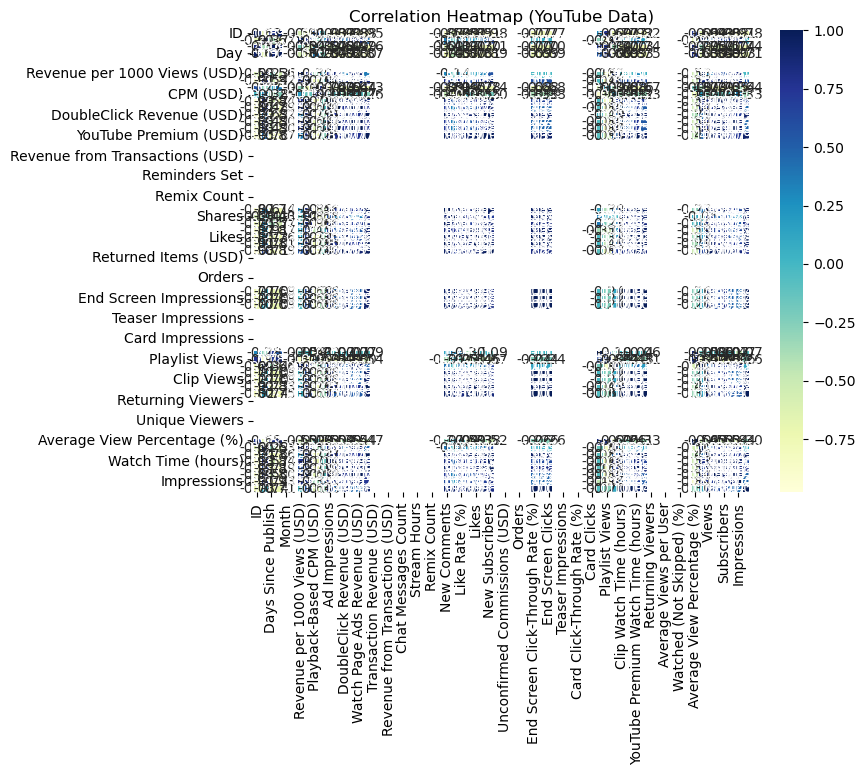

C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

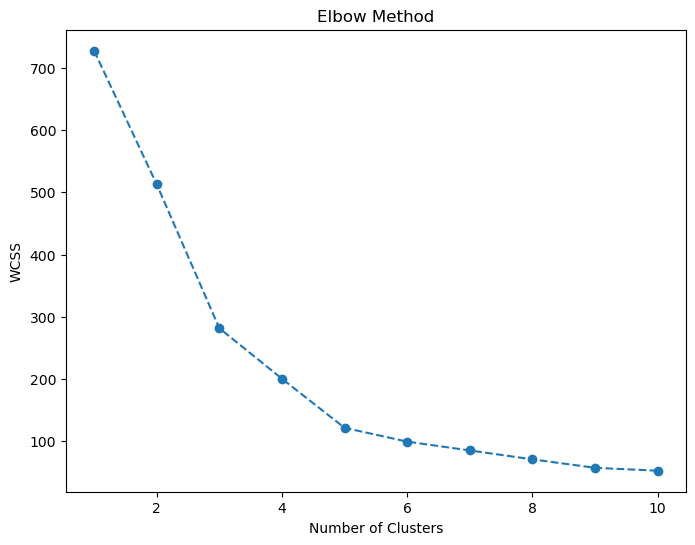

C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


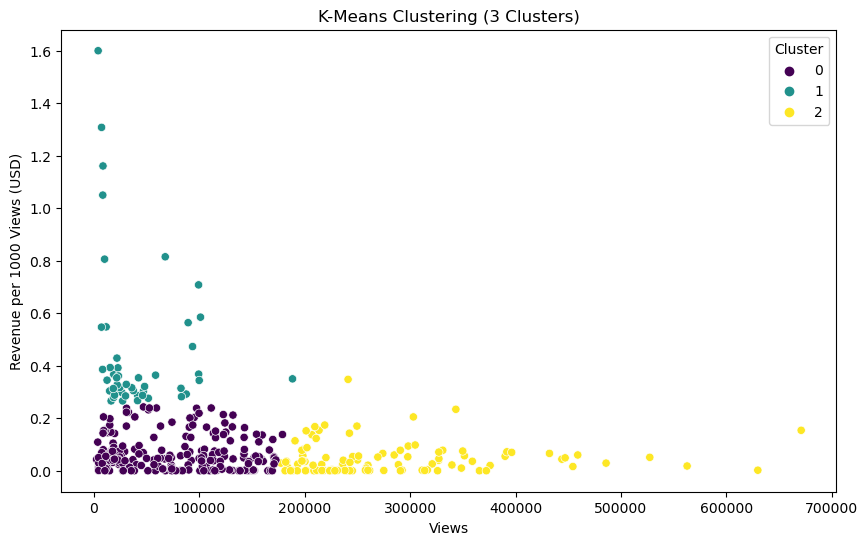

Mean Squared Error: 0.029932742088593024
R^2 Score: 0.07017849200844184


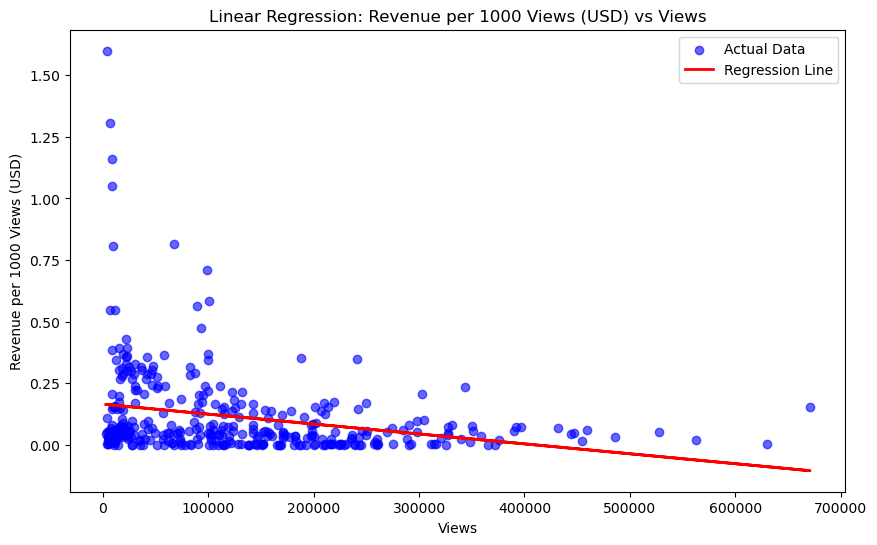

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
df_youtube = pd.read_csv("youtube_channel_real_performance_analytics.csv")

# Display the first few rows of the dataset
print(df_youtube.head())

# Data Cleaning
# Convert 'Video Publish Time' to datetime
df_youtube['Video Publish Time'] = pd.to_datetime(df_youtube['Video Publish Time'], errors='coerce')

# Drop rows with missing or invalid data
df_youtube.dropna(inplace=True)

# 1. Histogram to visualize the distribution of a numeric column
def create_youtube_histogram(data, column_name):
    """
    Creates a histogram to visualize the distribution of a specified column in the YouTube dataset.
    
    Parameters:
    - data: The DataFrame containing the YouTube data.
    - column_name: The name of the column to visualize.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=True, color='orange', bins=30)
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

# Example usage: Create a histogram for 'Views'
create_youtube_histogram(df_youtube, 'Views')

# 2. Scatter Plot for Video Views vs Likes
def create_youtube_scatter_plot(data, x_column, y_column):
    """
    Creates a scatter plot to visualize the relationship between two columns.
    
    Parameters:
    - data: The DataFrame containing the YouTube data.
    - x_column: The name of the column for the x-axis.
    - y_column: The name of the column for the y-axis.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column, color='purple', alpha=0.6)
    plt.title(f"{y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example usage: Scatter plot for 'Views' vs 'Subscribers'
create_youtube_scatter_plot(df_youtube, 'Views', 'Subscribers')

# 3. Heatmap to visualize correlation between numerical columns
def create_youtube_heatmap(data):
    """
    Creates a heatmap to visualize the correlation matrix of the YouTube dataset.
    
    Parameters:
    - data: The DataFrame containing the YouTube data.
    """
    # Select only numerical columns
    numeric_data = data.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap (YouTube Data)")
    plt.show()

# Example usage: Create a heatmap of correlations
create_youtube_heatmap(df_youtube.head(4))

# 4. Elbow Plot for K-Means Clustering to determine the number of clusters
def create_elbow_plot(data, features):
    """
    Creates an elbow plot to determine the optimal number of clusters for K-Means.
    
    Parameters:
    - data: The DataFrame containing the YouTube data.
    - features: The list of feature column names to use for clustering.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    
    wcss = []  # Within-cluster sum of squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

# Example usage: Elbow plot for 'Views' and 'Revenue per 1000 Views (USD)'
create_elbow_plot(df_youtube, ['Views', 'Revenue per 1000 Views (USD)'])

# 5. K-Means Clustering and Scatter Plot for Clusters
def perform_kmeans_and_plot(data, features, n_clusters):
    """
    Performs K-Means clustering and visualizes the results using a scatter plot.
    
    Parameters:
    - data: The DataFrame containing the YouTube data.
    - features: The list of feature column names to use for clustering.
    - n_clusters: The number of clusters to form.
    """
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[features])
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_scaled)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=features[0], y=features[1], hue='Cluster', palette='viridis')
    plt.title(f"K-Means Clustering ({n_clusters} Clusters)")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')
    plt.show()

# Example usage: K-Means clustering for 'Views' and 'Revenue per 1000 Views (USD)' with 3 clusters
perform_kmeans_and_plot(df_youtube, ['Views', 'Revenue per 1000 Views (USD)'], 3)

# 6. Linear Regression to predict 'Revenue per 1000 Views (USD)' based on 'Views'
def perform_linear_regression(data, x_column, y_column):
    """
    Performs linear regression on the specified columns and visualizes the results.
    
    Parameters:
    - data: The DataFrame containing the YouTube data.
    - x_column: The name of the column for the independent variable (X).
    - y_column: The name of the column for the dependent variable (y).
    """
    # Filter data to remove outliers or invalid values
    data = data.dropna(subset=[x_column, y_column])
    X = data[[x_column]].values
    y = data[y_column].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {model.score(X, y)}")

    # Plot regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], y, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(data[x_column], y_pred, color='red', linewidth=2, label='Regression Line')
    plt.title(f"Linear Regression: {y_column} vs {x_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()

# Example usage: Linear regression for 'Views' vs 'Revenue per 1000 Views (USD)'
perform_linear_regression(df_youtube, 'Views', 'Revenue per 1000 Views (USD)')


In [9]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                               ID  Video Duration  Days Since Publish  \
ID                       1.000000        0.214709            0.310896   
Video Duration           0.214709        1.000000            0.064094   
Days Since Publish       0.310896        0.064094            1.000000   
Day                      0.048912        0.036907           -0.016941   
Month                   -0.050793       -0.060594            0.053944   
...                           ...             ...                 ...   
Watch Time (hours)       0.176273        0.111037            0.044417   
Subscribers              0.139118       -0.025584            0.034808   
Estimated Revenue (USD)  0.269610        0.135767            0.176890   
Impressions              0.227320        0.039546            0.060949   
Video Thumbnail CTR (%)  0.292690       -0.190195            0.062201   

                              Day     Month      Year  \
ID                       0.048912 -0.050793  

In [10]:
#Descriptive Statistics
df.describe()

,ID,Video Duration,Days Since Publish,Day,Month,Year,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),Playback-Based CPM (USD),CPM (USD),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000
mean,181.500000,664.239011,8.406593,15.807692,6.642857,2018.736264,0.112283,8934.711538,1.553734,1.059005,...,0.824176,0.008242,45.970989,285.612637,128800.101648,10058.965455,321.024725,8.852052,9.595286e+05,7.914615
std,105.221988,330.646183,15.371239,8.924004,3.421521,2.530629,0.179668,12967.843236,1.078549,0.728380,...,9.053369,0.090534,12.457470,116.595678,118209.844270,9516.160361,444.594763,13.414650,1.180519e+06,2.903383
min,0.000000,9.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.050000,8.000000,2461.000000,12.697900,-3.000000,0.000000,3.222800e+04,0.620000
25%,90.750000,496.000000,3.000000,8.000000,4.000000,2017.000000,0.015000,349.500000,0.817750,0.522000,...,0.000000,0.000000,40.252500,233.750000,27160.500000,2759.404250,41.000000,0.443250,1.317082e+05,6.420000
50%,181.500000,613.000000,5.000000,16.000000,7.000000,2018.000000,0.050000,3564.000000,1.540500,1.155500,...,0.000000,0.000000,45.465000,286.500000,101950.500000,8102.962950,180.000000,4.285000,6.204065e+05,8.395000
75%,272.250000,786.500000,9.000000,23.000000,10.000000,2021.000000,0.143500,13579.250000,2.025250,1.458750,...,0.000000,0.000000,51.010000,344.250000,198169.500000,14084.498550,421.250000,11.476250,1.368464e+06,9.920000
max,363.000000,2311.000000,260.000000,31.000000,12.000000,2024.000000,1.600000,100566.000000,7.385000,6.295000,...,100.000000,1.000000,117.300000,776.000000,670990.000000,53794.658700,3728.000000,103.117000,1.270226e+07,27.660000
